# Data Gathring Intro

In [11]:
import sys
!{sys.executable} -m pip install gitpython

In [12]:
from git import Repo

Repo.clone_from("https://github.com/zeeguu-ecosystem/Zeeguu-Core", "/Users/mircea/Zeeguu-Core")

GitCommandError: Cmd('git') failed due to: exit code(128)
  cmdline: git clone -v https://github.com/zeeguu-ecosystem/Zeeguu-Core /Users/mircea/Zeeguu-Core
  stderr: 'fatal: destination path '/Users/mircea/Zeeguu-Core' already exists and is not an empty directory.
'

In [ ]:
repo = Repo("/Users/mircea/Zeeguu-Core")

## Let's find the largest python file in the repository

In [13]:
!{sys.executable} -m pip install pathlib

In [14]:
from pathlib import Path
for file in Path('/Users/mircea/Zeeguu-Core/').rglob("*.py"):
    print(file)

/Users/mircea/Zeeguu-Core/__init__.py
/Users/mircea/Zeeguu-Core/setup.py
/Users/mircea/Zeeguu-Core/tools/add_standard_topics.py
/Users/mircea/Zeeguu-Core/tools/fill_historical_reading_sessions.py
/Users/mircea/Zeeguu-Core/tools/migrate_starredarticle_2_userarticle.py
/Users/mircea/Zeeguu-Core/tools/bookmark_info.py
/Users/mircea/Zeeguu-Core/tools/fix_bookmark_learned_status.py
/Users/mircea/Zeeguu-Core/tools/article_crawler.py
/Users/mircea/Zeeguu-Core/tools/consolidate_accounts.py
/Users/mircea/Zeeguu-Core/tools/fix_bookmark_priorities.py
/Users/mircea/Zeeguu-Core/tools/fill_article_ids.py
/Users/mircea/Zeeguu-Core/tools/map_article_words.py
/Users/mircea/Zeeguu-Core/tools/anonimize_user.py
/Users/mircea/Zeeguu-Core/tools/feed_retrieval.py
/Users/mircea/Zeeguu-Core/tools/remove_unreferenced_articles.py
/Users/mircea/Zeeguu-Core/tools/learner_level.py
/Users/mircea/Zeeguu-Core/tools/recompute_fk_difficulties_for_polish.py
/Users/mircea/Zeeguu-Core/tools/tag_existing_articles.py
/Users/

In [15]:
def LOC(file):
    return sum([1 for line in open(file)])

LOC('/Users/mircea/Zeeguu-Core/zeeguu_core_test/rules/user_rule.py')
    

56

In [16]:
def NOM(file):
    # number of methods
    pass

In [17]:
files = Path('/Users/mircea/Zeeguu-Core/').rglob("*.py")

print(max([(f,LOC(str(f))) for f in files], key= lambda x: x[1]))

(PosixPath('/Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py'), 575)


In [18]:
from pathlib import Path

files_and_LOCs = []
for file in Path('/Users/mircea/Zeeguu-Core/').rglob("*.py"):
    files_and_LOCs.append( 
        (LOC(str(file)),
         str(file)
        )
    )

files_and_LOCs.sort(key = lambda x: -x[0])
for each in files_and_LOCs:
    print (str(each[0]) + " " + str(each [1]))

575 /Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py
475 /Users/mircea/Zeeguu-Core/zeeguu_core/word_scheduling/arts/tools/algo_parameter_approximator.py
403 /Users/mircea/Zeeguu-Core/zeeguu_core/model/user_reading_session.py
336 /Users/mircea/Zeeguu-Core/zeeguu_core/content_recommender/mixed_recommender.py
328 /Users/mircea/Zeeguu-Core/zeeguu_core/model/bookmark.py
287 /Users/mircea/Zeeguu-Core/zeeguu_core/language/strategies/word_history_difficulty_estimator.py
280 /Users/mircea/Zeeguu-Core/zeeguu_core/model/word_knowledge/word_interaction_history.py
274 /Users/mircea/Zeeguu-Core/zeeguu_core/model/article.py
257 /Users/mircea/Zeeguu-Core/zeeguu_core/model/user_activitiy_data.py
238 /Users/mircea/Zeeguu-Core/zeeguu_core/model/user_exercise_session.py
228 /Users/mircea/Zeeguu-Core/zeeguu_core/content_retriever/article_downloader.py
226 /Users/mircea/Zeeguu-Core/zeeguu_core/model/feed.py
218 /Users/mircea/Zeeguu-Core/zeeguu_core_test/test_bookmark.py
205 /Users/mircea/Zeeguu-Core/zeeg

In [19]:
def size_of_all_files(sizes_and_files):
    pass

## Recovering Module Views

- modules & dependencies between them
  - modules are easy
  - how to extract the **dependencies**?

In [20]:
lines = [line for line in open('/Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py')]

for line in lines[:10]:    
    print(line)

#

import datetime

import json

import random

import re



import sqlalchemy.orm

import zeeguu_core

from sqlalchemy import Column, ForeignKey, Integer, func

from sqlalchemy.orm import relationship



In [21]:
import re

def extract_import_from_line(line):
    # TODO: think about how to detect imports when
    # they are inside a function / method
    x = re.search("^import (\S+)", line) 
    x = re.search("^from (\S+)", line) 
    return x.group(1)

extract_import_from_line('from sqlalchemy import Column, ForeignKey, Integer, func')




'sqlalchemy'

In [22]:
def imports(file):
    lines = [line for line in open(file)]
    
    all_imports = []
    for line in lines:
        try:
            all_imports.append(extract_import_from_line(line))
        except:
            continue

    return all_imports

print(imports('/Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py'))

['sqlalchemy', 'sqlalchemy.orm', 'sqlalchemy.orm.exc', 'zeeguu_core', 'zeeguu_core.language.difficulty_estimator_factory', 'zeeguu_core.model']


## Extracting module from file name

/Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py 
->
zeeguu_core.model.user



In [23]:
def module_from_file_path(folder_prefix, full_path):
    file_name = full_path[len(folder_prefix):]
    file_name = file_name.replace("/",".")
    file_name = file_name.replace(".py","")
    return file_name

def module(full_path):
    return module_from_file_path('/Users/mircea/Zeeguu-Core/', full_path)

module('/Users/mircea/Zeeguu-Core/zeeguu_core/model/user.py')

'zeeguu_core.model.user'

In [24]:
!{sys.executable} -m pip install networkx --upgrade

Requirement already up-to-date: networkx in /Users/mircea/anaconda/lib/python3.5/site-packages (2.4)


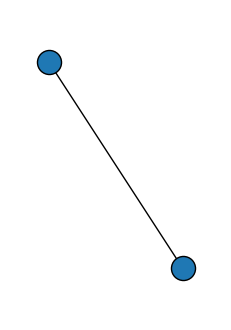

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_node(1)
G.add_node(1)
G.add_node(2)

G.add_edge(1, 2)

plt.subplot(121)
nx.draw(G, font_weight='bold')
plt.show()

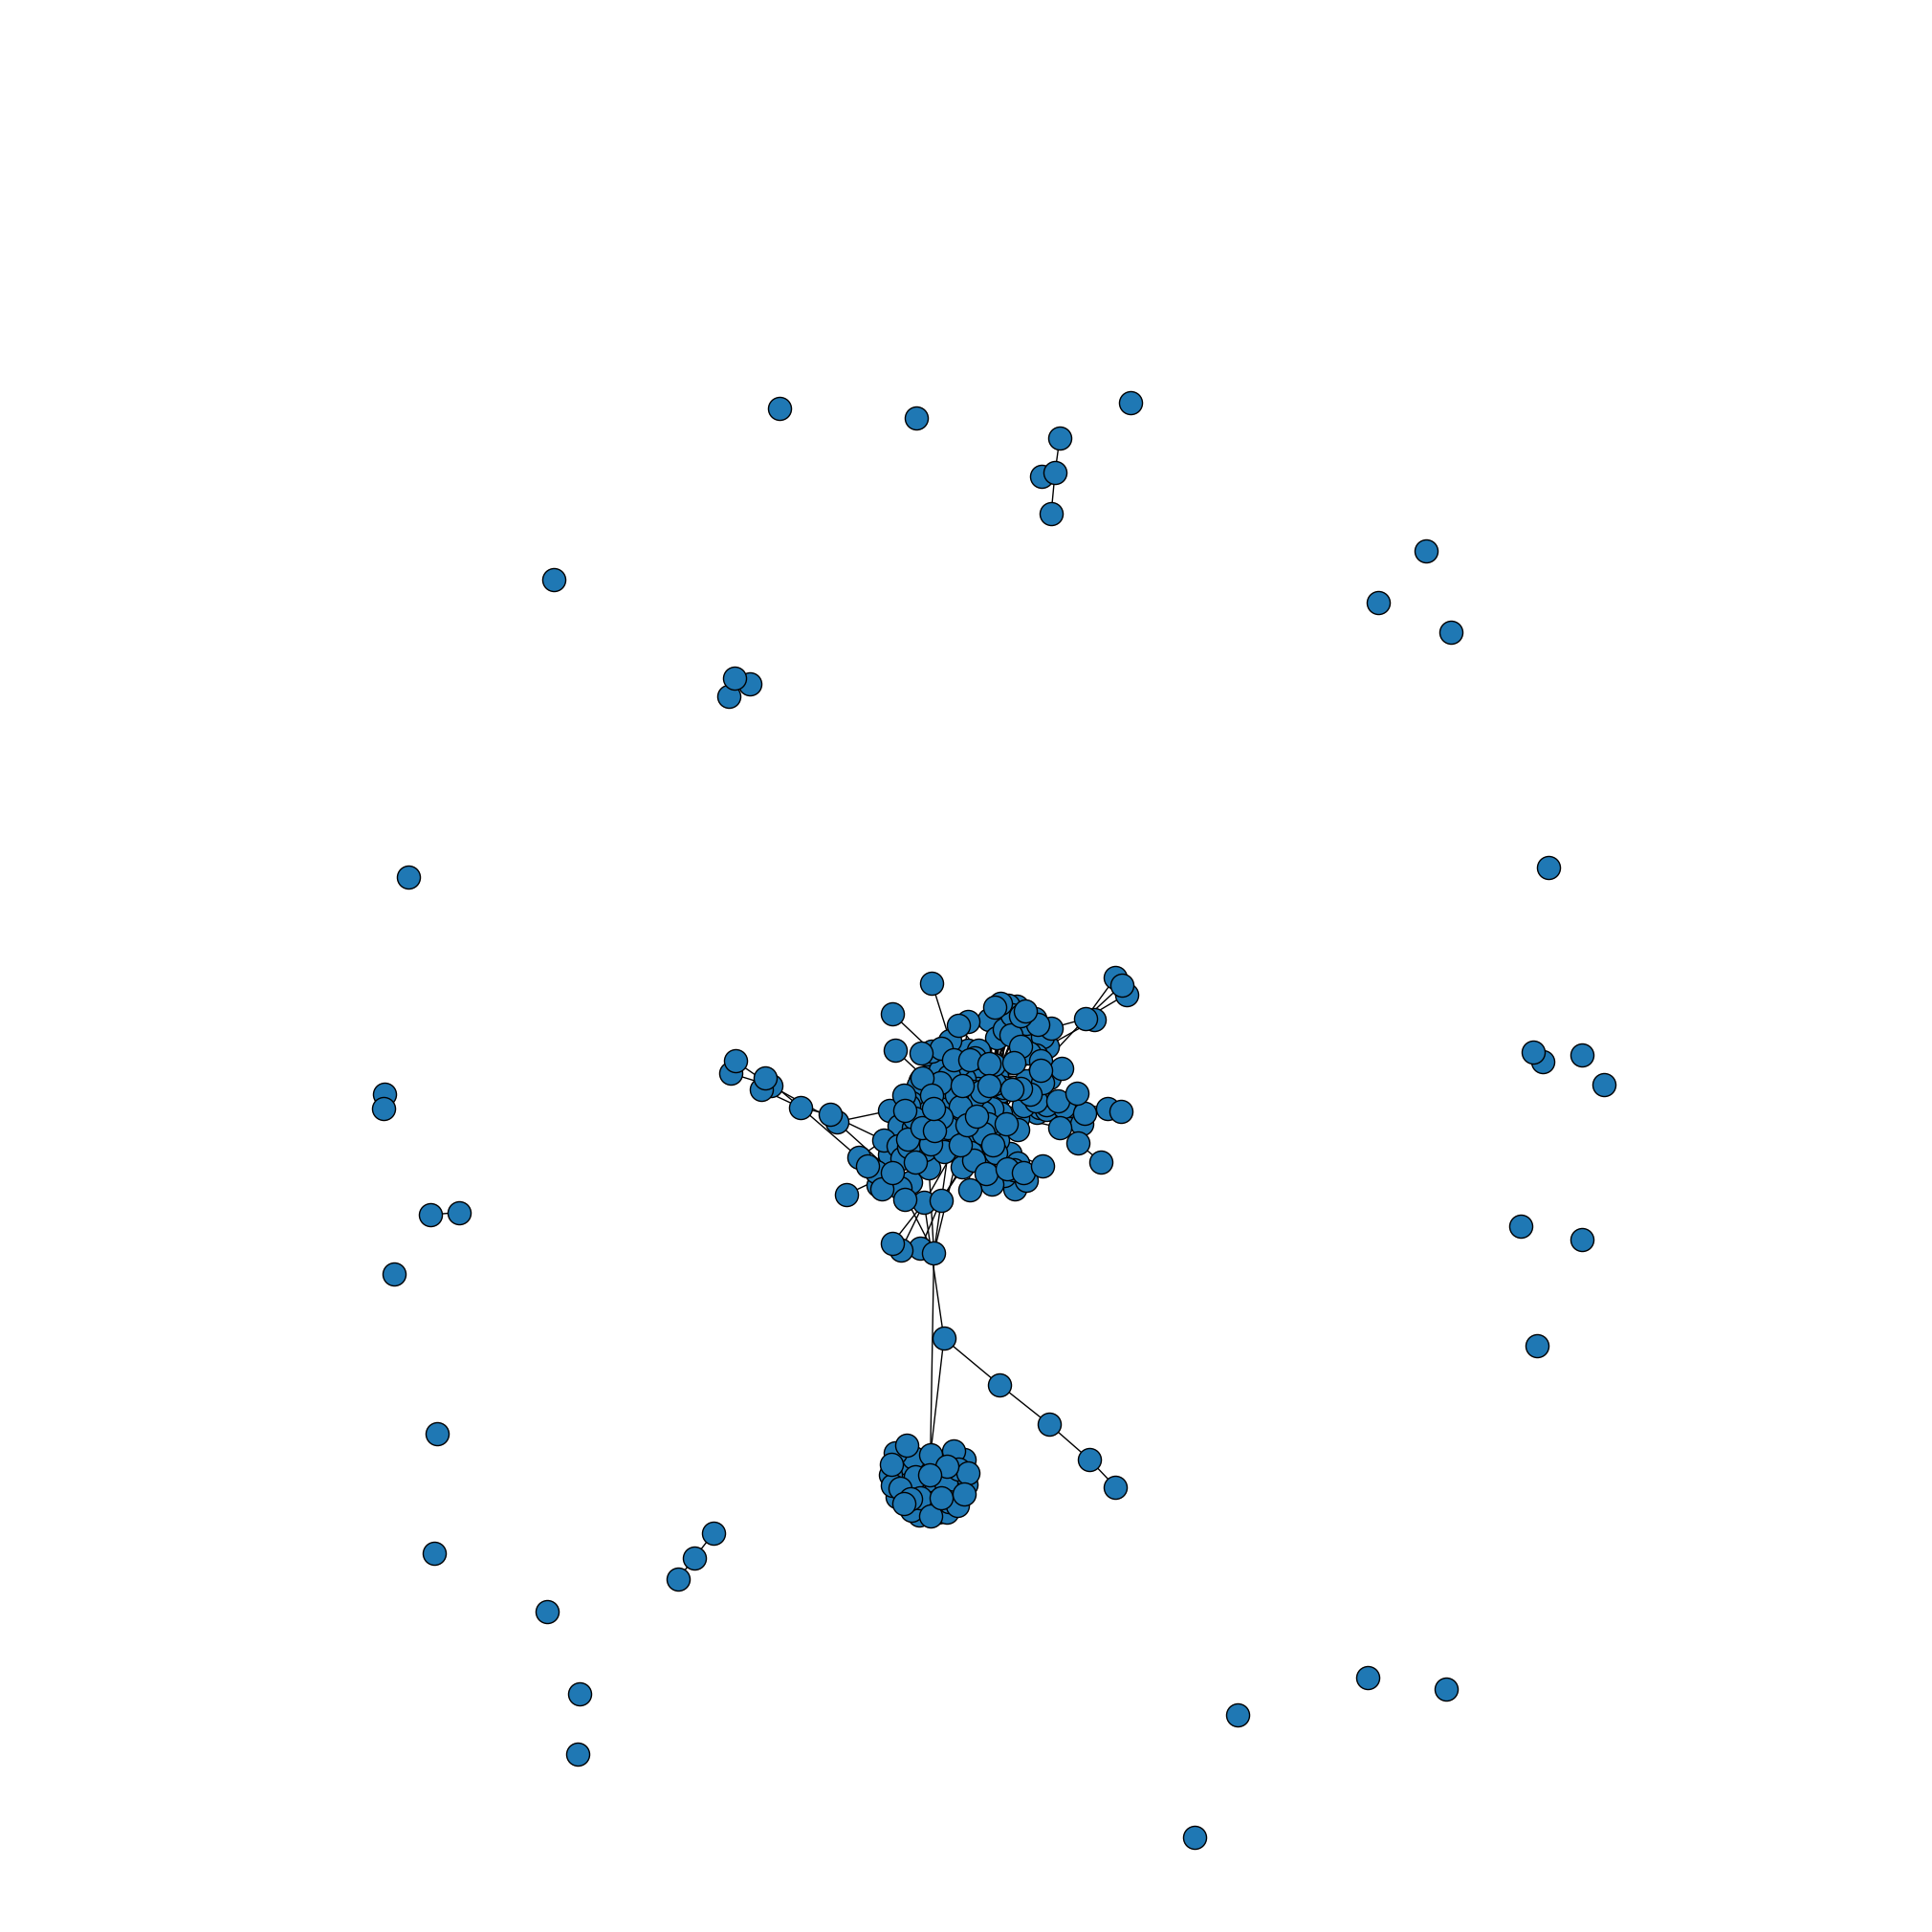

In [27]:
files = Path('/Users/mircea/Zeeguu-Core/').rglob("*.py")

G = nx.Graph()

for file in files:
    m = module(str(file))
    if m not in G.nodes:
        G.add_node(m)
    
    for each in imports(str(file)):
        G.add_edge(m, each)
        

plt.figure(figsize=(20,20))
nx.draw(G, font_weight='bold', show_labels=True)
plt.show()
    
    
